# members.csv
user information.

- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
members=pd.read_csv('data/members.csv')
print(members.head())
print(members.info())

                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via  registration_init_time  expiration_date  
0               7                20110820         20170920  
1               7                20150628         20170622  
2               4                20160411         20170712  
3               9                20150906         20150907  
4               4                20170126         20170613  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                    

Notes:
- Most likely customer gender won't be a factor to decide whether a song is played again or not since this property has many NaN
- Registration_init_time and expiration_date need to be transform to datetime format

In [3]:
#Transform registration_init_time and expiration_date into datetime format
members['registration_init_time']=pd.to_datetime(members['registration_init_time'],format='%Y%m%d')
members['expiration_date']=pd.to_datetime(members['expiration_date'],format='%Y%m%d')
print(members.head())
print(members.info())

                                           msno  city  bd gender  \
0  XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=     1   0    NaN   
1  UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=     1   0    NaN   
2  D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=     1   0    NaN   
3  mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=     1   0    NaN   
4  q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=     1   0    NaN   

   registered_via registration_init_time expiration_date  
0               7             2011-08-20      2017-09-20  
1               7             2015-06-28      2017-06-22  
2               4             2016-04-11      2017-07-12  
3               9             2015-09-06      2015-09-07  
4               4             2017-01-26      2017-06-13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 no

In [4]:
#Transform city, gender and registered_via columns into type category
members['city']=members['city'].astype('category')
members['gender']=members['gender'].astype('category')
members['registered_via']=members['registered_via'].astype('category')
print(members.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null category
bd                        34403 non-null int64
gender                    14501 non-null category
registered_via            34403 non-null category
registration_init_time    34403 non-null datetime64[ns]
expiration_date           34403 non-null datetime64[ns]
dtypes: category(3), datetime64[ns](2), int64(1), object(1)
memory usage: 1.1+ MB
None


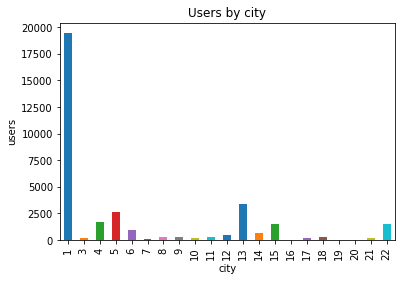

In [7]:
#Plot number of users by city
members_by_city=members.groupby('city').msno.count()
members_by_city.plot(kind='bar')
plt.title('Users by city')
plt.ylabel('users')
plt.show()

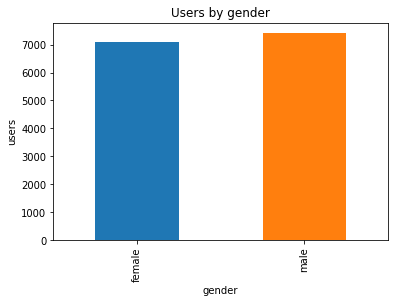

In [8]:
#Plot number of users by gender
members_by_gender=members.groupby('gender').msno.count()
members_by_gender.plot(kind='bar')
plt.title('Users by gender')
plt.ylabel('users')
plt.show()

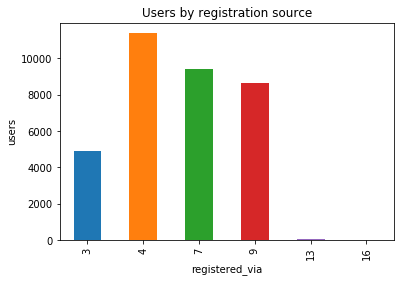

In [9]:
#Plot number of users by registration source
members_by_registered_via=members.groupby('registered_via').msno.count()
members_by_registered_via.plot(kind='bar')
plt.title('Users by registration source')
plt.ylabel('users')
plt.show()

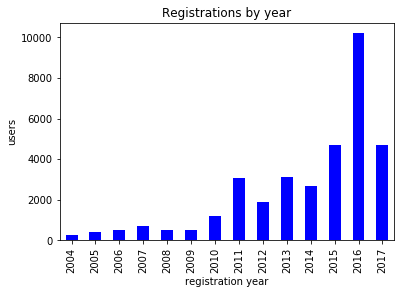

In [10]:
#Plot distribution of registrations by year
registrations_by_year=members.groupby(members['registration_init_time'].dt.year).msno.count()
registrations_by_year.plot(kind='bar', color='blue')
plt.title('Registrations by year')
plt.ylabel('users')
plt.xlabel('registration year')
plt.show()

KKbox was launched in 2004, so the registration date distribution makes sense. 

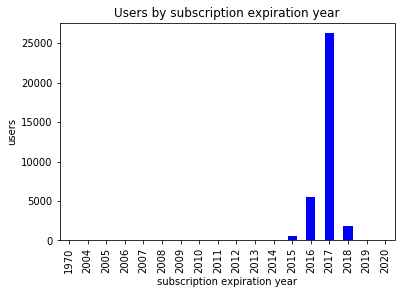

In [11]:
#Plot distribution of users by subscription expiration year
expiration_by_year=members.groupby(members['expiration_date'].dt.year).msno.count()
expiration_by_year.plot(kind='bar', color='blue')
plt.title('Users by subscription expiration year')
plt.ylabel('users')
plt.xlabel('subscription expiration year')
plt.show()

In [12]:
#Remove rows where expiration date is before 2004
members=members[members['expiration_date']>='2004-01-01']

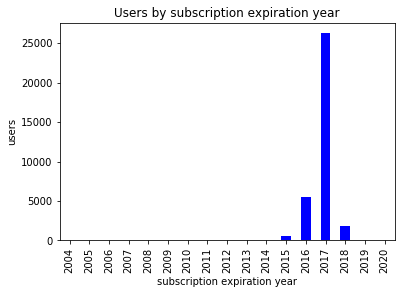

In [13]:
#Plot clean distribution of users by subscription expiration year
expiration_by_year=members.groupby(members['expiration_date'].dt.year).msno.count()
expiration_by_year.plot(kind='bar', color='blue')
plt.title('Users by subscription expiration year')
plt.ylabel('users')
plt.xlabel('subscription expiration year')
plt.show()

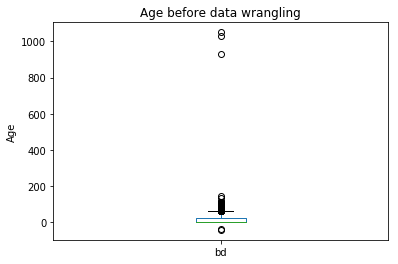

In [6]:
#Box plot for member age
members['bd'].plot(kind='box')
plt.ylabel('Age')
plt.title('Age before data wrangling')
plt.show()

In the age boxplot we can see there are multiple outlayers. 

In [15]:
#Describe age column
members['bd'].describe()

count    34402.000000
mean        12.281292
std         18.170394
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In order to continue exploring the age variable, we will create a view dropping users with ages less than 0 and more than 120, which are clearly wrong values.

In [8]:
members_view=members[(members['bd']>=0) & (members['bd']<120)]
members_view['bd'].describe()

count    34396.000000
mean        12.190226
std         15.592248
min          0.000000
25%          0.000000
50%          0.000000
75%         25.000000
max        112.000000
Name: bd, dtype: float64

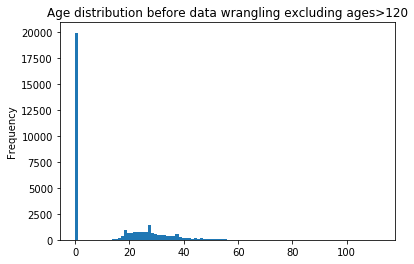

In [14]:
#Histogram for member age after removing clear outlayers
members_view['bd'].plot(kind='hist', bins=100)
plt.title('Age distribution before data wrangling excluding ages>120')
plt.show()

Users with age=0 seem to be missing values. We will transform those in missing values as well as the clear outlayers.

In [10]:
#Transform age<=0 and age>120 to NaN
members['bd']=members['bd'].map(lambda x: np.nan if x<=0 or x>120 else x)
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,14464.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,28.988869,5.953376,2.013994e+07,2.016901e+07
std,6.243929,9.547833,2.287534,2.954015e+04,7.320925e+03
min,1.000000,2.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,22.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,27.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,34.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,112.000000,16.000000,2.017023e+07,2.020102e+07


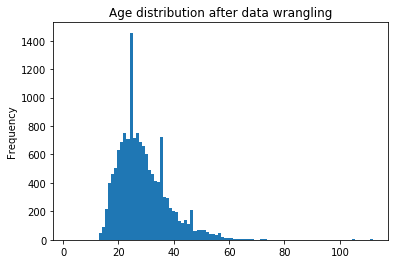

In [15]:
#Histogram for member age after removing clear outlayers and transforming zero values
members['bd'].plot(kind='hist', bins=100)
plt.title('Age distribution after data wrangling')
plt.show()

Most likely KKbox does not allow users under 13 to register in the service. We will consider users below this age to be as well missing values. As well, it doesn't seem very likely that users above 100 years old will be using the service. We will consider those as well missing values. 

In [20]:
#Transform age<13 into Nan
members['bd']=members['bd'].map(lambda x: np.nan if x<13 or x>100 else x)
members.describe()

,bd
count,14439.000000
mean,28.909551
std,9.159444
min,13.000000
25%,22.000000
50%,27.000000
75%,34.000000
max,97.000000


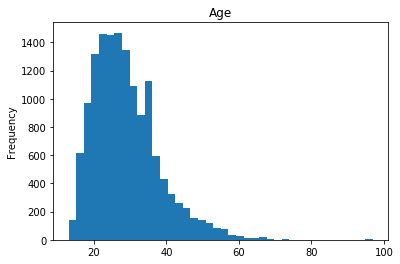

In [21]:
#Histogram for member age
members['bd'].plot(kind='hist',bins=40)
plt.title('Age')
plt.show()

In [ ]:
members.info()

In [22]:
#Check if NaN in gender correspond to NaN in age
members[members['gender'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19901 entries, 0 to 34402
Data columns (total 7 columns):
msno                      19901 non-null object
city                      19901 non-null category
bd                        419 non-null float64
gender                    0 non-null category
registered_via            19901 non-null category
registration_init_time    19901 non-null datetime64[ns]
expiration_date           19901 non-null datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(1), object(1)
memory usage: 836.8+ KB


Most of users with missing gender also have missing age. 
Since there are many missing values in gender and age, most likely we won't be able to drive conclusions based on these factors.

In [23]:
#Export clean file as members_clean.csv
members.to_csv('data/members_clean.csv', index=False)